#  Spam Mail Detection Using Machine Learning 

# Importing Libraries 

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Data Collection & Pre-Processing
# Loading the data from csv file to a pandas DataFrame

In [46]:
# Loading the data from csv file to a pandas DataFrame
raw_mail_data = pd.read_csv('spam_ham_dataset_.csv')
#print(raw_mail_data)

NameError: name 'pd' is not defined

# EDA

In [31]:
train_data.info(

SyntaxError: incomplete input (3800767785.py, line 1)

In [33]:
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

NameError: name 'train_data' is not defined

In [35]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

NameError: name 'df_num' is not defined

In [37]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

NameError: name 'sns' is not defined

In [39]:
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

NameError: name 'pd' is not defined

In [41]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

NameError: name 'df_cat' is not defined

In [43]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            train_data,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train_data,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x

NameError: name 'pd' is not defined

# Data Cleaning  

In [20]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [22]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [23]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [24]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Enginneering 

In [26]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)

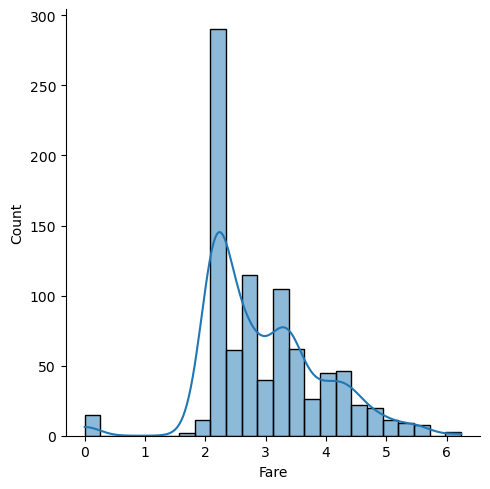

In [27]:
sns.displot(train_data["Fare"], kde=True)

<Axes: >

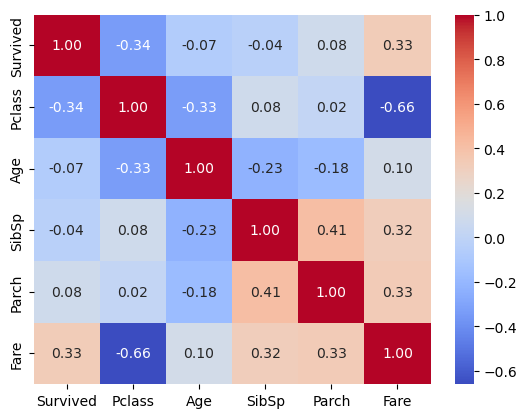

In [28]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [29]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [30]:
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,2
1,1,1,0,38.000000,1,0,4.280593,0
2,1,3,0,26.000000,0,0,2.188856,2
3,1,1,0,35.000000,1,0,3.990834,2
4,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.699118,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0


# Setting up the Parameters for the Model  

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7668161434977578
CV SCORE : 0.7688280710564308


In [34]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model)

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

In [ ]:
model = XGBClassifier()
model.fit(X, y)

In [ ]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

In [ ]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

# Data Preprocessing

In [ ]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

# Model Testing 

In [ ]:
pred = model.predict(X_test)
pred

# Test Submission 

In [ ]:
submit = pd.read_csv("data/gender_submission.csv")
submit

In [ ]:
submit["Survived"] = pred

submit

In [ ]:
submit.info()

In [ ]:
submit.to_csv("Submission.csv", index=False)

# The Accuracy of the Model is 73.8%